In [1]:
import os
os.chdir('C:/Users/viswanath_thatha/Downloads')

In [4]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import random
from sklearn import preprocessing
from scipy.sparse import csr_matrix
from sklearn.preprocessing import MinMaxScaler
from math import sqrt
from scipy.sparse import hstack

In [8]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import mean_squared_error

In [11]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
import nltk
from nltk.corpus import stopwords

In [30]:
!python -m pip install --upgrade pip

  Retrying (Retry(total=4, connect=None, read=None, redirect=None, status=None)) after connection broken by 'ProxyError('Cannot connect to proxy.', ConnectionResetError(10054, 'An existing connection was forcibly closed by the remote host', None, 10054, None))': /packages/d8/f3/413bab4ff08e1fc4828dfc59996d721917df8e8583ea85385d51125dceff/pip-19.0.3-py2.py3-none-any.whl
  Retrying (Retry(total=3, connect=None, read=None, redirect=None, status=None)) after connection broken by 'ProxyError('Cannot connect to proxy.', ConnectionResetError(10054, 'An existing connection was forcibly closed by the remote host', None, 10054, None))': /packages/d8/f3/413bab4ff08e1fc4828dfc59996d721917df8e8583ea85385d51125dceff/pip-19.0.3-py2.py3-none-any.whl
  Retrying (Retry(total=2, connect=None, read=None, redirect=None, status=None)) after connection broken by 'ProxyError('Cannot connect to proxy.', ConnectionResetError(10054, 'An existing connection was forcibly closed by the remote host', None, 10054, No

In [19]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [20]:
train = pd.read_csv('train.csv').fillna(' ')

In [22]:
train.shape

(45000, 5)

In [24]:
stop_words = set(stopwords.words('english'))

In [31]:
train['score'].value_counts()

 1       15430
 2        7250
 3        4078
 0        1923
 4        1892
 5        1832
 6        1371
 7        1070
 8         830
-1         746
 9         661
 10        569
 11        514
 12        388
-2         377
 13        377
 14        324
 15        287
 16        240
 17        233
-3         215
 18        203
 19        194
 20        170
-4         164
 22        150
 21        144
-5         127
 23        116
 24        115
         ...  
 211         1
 179         1
 1746        1
 626         1
 562         1
 338         1
 274         1
 210         1
 146         1
-142         1
-46          1
 561         1
 401         1
 241         1
 144         1
 209         1
 177         1
 145         1
-47          1
 912         1
 784         1
 720         1
 592         1
 528         1
 496         1
 432         1
 304         1
 208         1
 176         1
 1039        1
Name: score, Length: 427, dtype: int64

C:\Users\viswanath_thatha\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


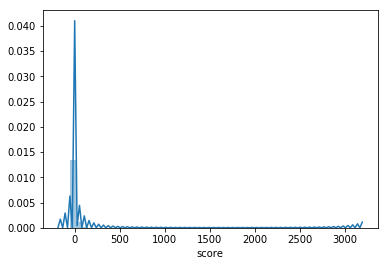

In [39]:
sns.distplot(train['score'])

In [51]:
train_text = train.comment + train.parent_comment
word_vectorize = TfidfVectorizer(token_pattern=r'\w{1,}')
word_vectorize.fit(train_text)
train_word_features = word_vectorize.transform(train_text)

TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), norm='l2', preprocessor=None, smooth_idf=True,
        stop_words=None, strip_accents=None, sublinear_tf=False,
        token_pattern='\\w{1,}', tokenizer=None, use_idf=True,
        vocabulary=None)

In [52]:
char_vectorize = TfidfVectorizer(analyzer='char')
char_vectorize.fit(train_text)
train_char_features = char_vectorize.transform(train_text)

TfidfVectorizer(analyzer='char', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), norm='l2', preprocessor=None, smooth_idf=True,
        stop_words=None, strip_accents=None, sublinear_tf=False,
        token_pattern='(?u)\\b\\w\\w+\\b', tokenizer=None, use_idf=True,
        vocabulary=None)